<a href="https://colab.research.google.com/github/FisherKob/Linear_Programming_pyomo/blob/main/Mathematical_Optimization_Pyomo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Programming

In [ ]:
!apt-get install -y -qq glpk-utils

In [ ]:
!pip install pyomo

     |████████████████████████████████| 8.9MB 8.0MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 


In [ ]:
!pip install glpk

     |████████████████████████████████| 163kB 7.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for glpk
  Running setup.py clean for glpk
Failed to build glpk
ERROR: Could not build wheels for glpk which use PEP 517 and cannot be installed directly


In [ ]:
import pyomo.environ as pyomo

An airline offers coach and first-class tickets. For the airline to be profitable, it must sell a minimum of 25 first-class tickets and a minimum of 40 coach tickets. The company makes a profit of 225 for each coach ticket and $200 for each first-class ticket. At most, the plane has a capacity of 150 travelers. How many of each ticket should be sold in order to maximize profits?

In [ ]:
#Model definition
model=pyomo.ConcreteModel()

#Variable definition
model.f=pyomo.Var()
model.c=pyomo.Var()

#Objective function
model.obj=pyomo.Objective(expr=225*model.c+200*model.f,sense=pyomo.maximize)

#Constraints
def rule1(model):
  return model.f>=25
model.eq1=pyomo.Constraint(rule=rule1, doc='Constraint 1')

def rule2(model):
  return model.c>=40
model.eq2=pyomo.Constraint(rule=rule2,doc='Contraint 2')

def rule3(model):
  return model.f+model.c==150
model.eq3=pyomo.Constraint(rule=rule3, doc='Constraint 3')

#Results
results=pyomo.SolverFactory('glpk',executable='/usr/bin/glpsol').solve(model)

In [ ]:
results.write()
print('\n RESULTS \n')
print('Profit Maximize Objective=',model.obj())
print('# of First Class tickets needed=',model.f())
print('# of Coach Class tickers needed=',model.c())
print('')

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 33125.0
  Upper bound: 33125.0
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 3
  Number of nonzeros: 5
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.014594793319702148
# ----------------------------------------------------------
#   Solution Information
# --------------------------------

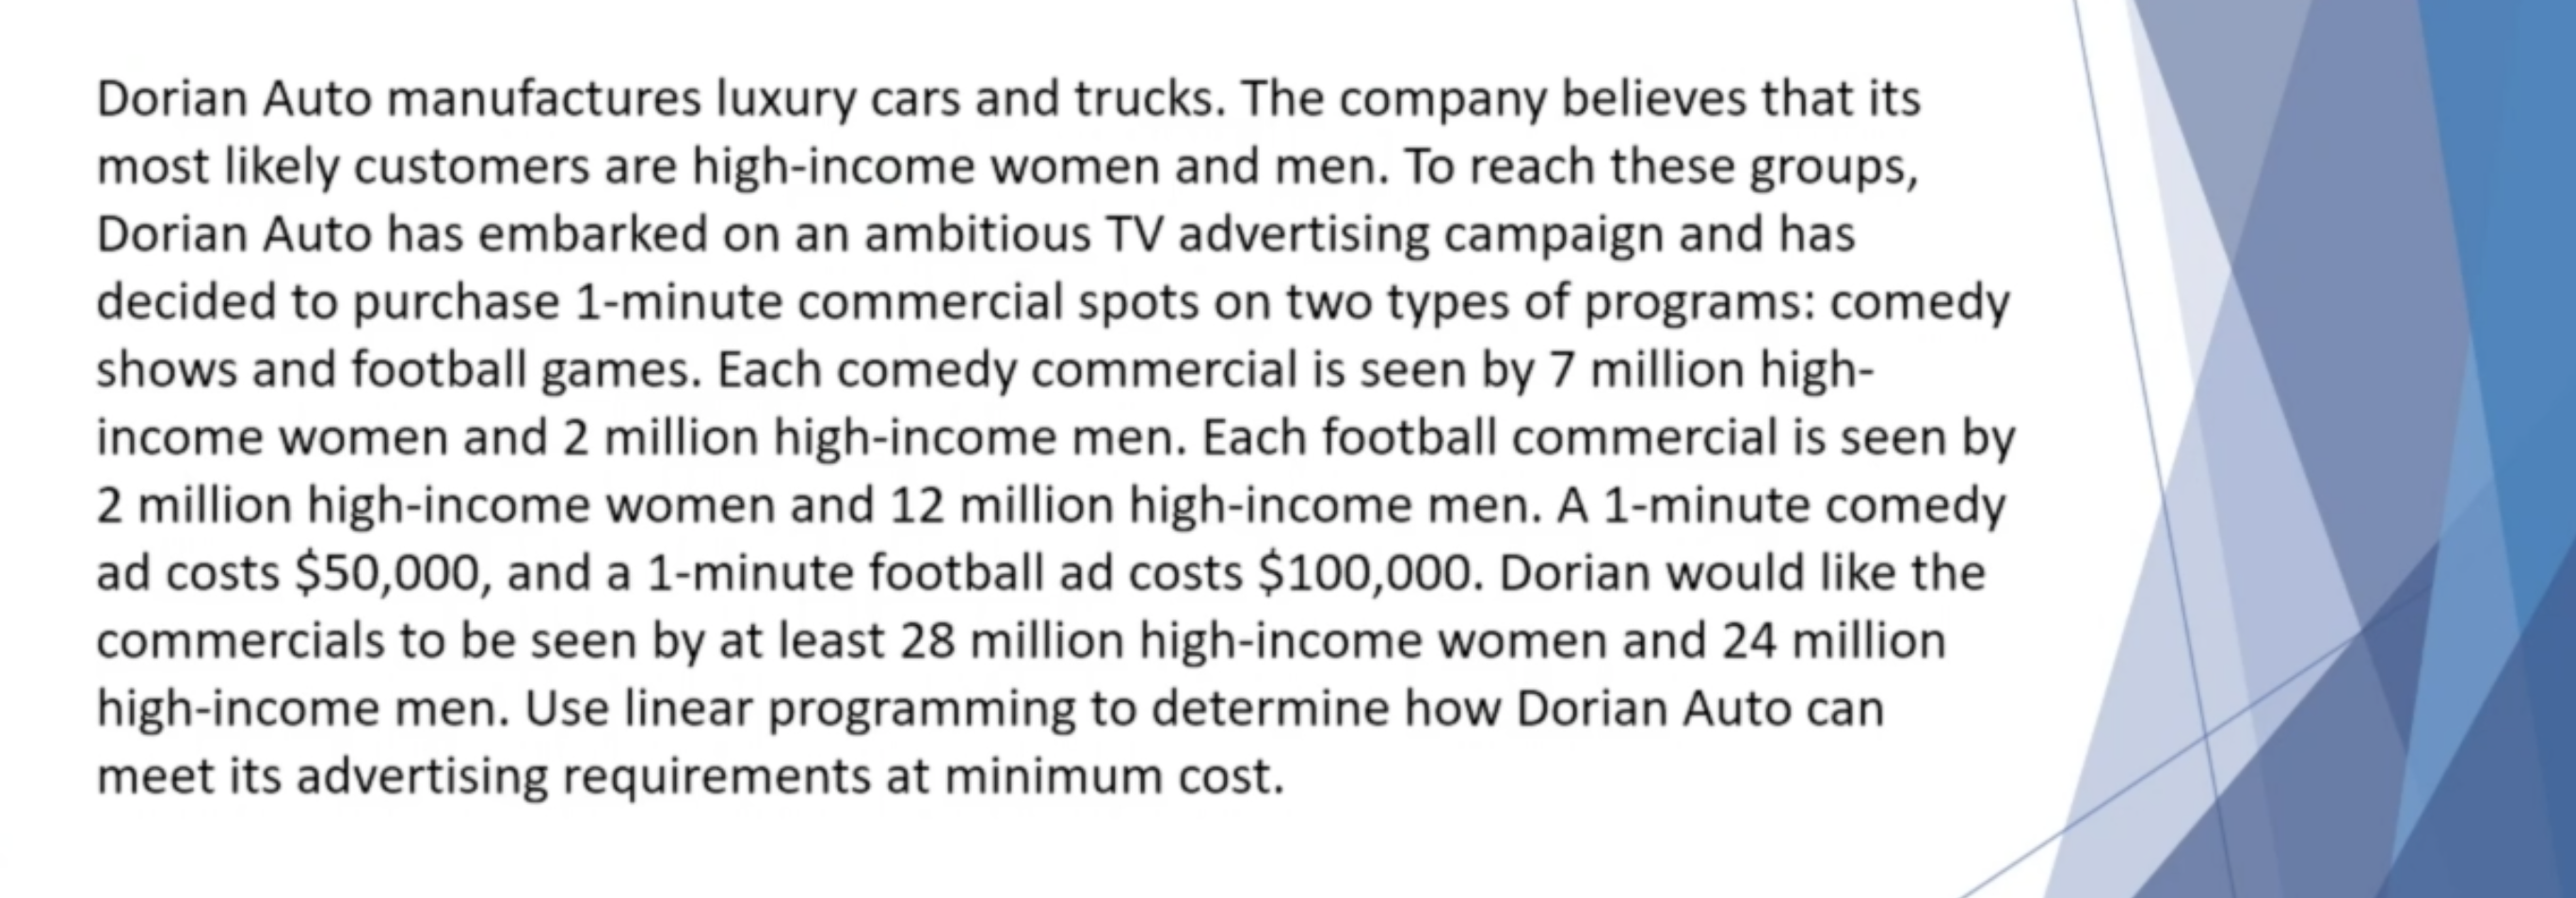

In [ ]:
# Modeling definiion
model=pyomo.ConcreteModel();

# Variable definition
model.x1=pyomo.Var();
model.x2=pyomo.Var();

# Objective function
model.obj=pyomo.Objective(expr=50*model.x1+100*model.x2,sense=pyomo.minimize)

# Constraint definition
def rule1(model):
  return 7*model.x1+2*model.x2>=28
model.eq1=pyomo.Constraint(rule=rule1,doc='Constraint 1');

def rule2(model):
  return 2*model.x1+12*model.x2>=24
model.eq2=pyomo.Constraint(rule=rule2,  doc='Constraint 2');

# Solver options
#When running in Colab,add PATH for the solver executable file
results=pyomo.SolverFactory('glpk',executable='/usr/bin/glpsol').solve(model);

In [ ]:
#Print Results
results.write()
print("\n RESULTS \n")
print('Cost of Advertisement campaign=', model.obj());
print('# of comedy ads purchased =', model.x1());
print('# of football ads purhcased=',model.x2());



# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 320.0
  Upper bound: 320.0
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Number of nonzeros: 5
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.010925531387329102
# ----------------------------------------------------------
#   Solution Information
# ------------------------------------

A company makes two products (X and Y) using two machines (A and B). Each unit of X that is produced requires 50 minutes processing time on machine A and 30 minutes processing time on machine B. Each unit of Y that is produced requires 24 minutes processing time on machine A and 33 minutes processing time on machine B.

At the start of the current week there are 30 units of X and 90 units of Y in stock. Available processing time on machine A is forecast to be 40 hours and on machine B is forecast to be 35 hours.

The demand for X in the current week is forecast to be 75 units and for Y is forecast to be 95 units. Company policy is to maximise the combined sum of the units of X and the units of Y in stock at the end of the week.

Formulate the problem of deciding how much of each product to make in the current week as a linear program.

In [ ]:
# Model Definition
model=pyomo.ConcreteModel()

# Variable Definition
model.x=pyomo.Var()
model.y=pyomo.Var()

# Objection Function
model.obj=pyomo.Objective(expr=model.x+model.y-50, sense=pyomo.maximize)

#Constraints
def rule1(model):
  return model.x>=45
model.eq1=pyomo.Constraint(rule=rule1, doc='Constraint 1')

def rule2(model):
  return model.y>=5
model.eq2=pyomo.Constraint(rule=rule2, doc='Contraint 2')

def rule3(model):
  return 50*model.x+24*model.y<=2400
model.eq3=pyomo.Constraint(rule=rule3, doc='Constraint 3')

def rule4(model):
  return 30*model.x + 33* model.y<=2100
model.eq4=pyomo.Constraint(rule=rule4, doc='Constraint 4')

# Results
results=pyomo.SolverFactory('glpk',executable='/usr/bin/glpsol').solve(model)



In [ ]:
results.write()
print('\n RESULTS \n')
print('The maximized x and y are', model.obj())
print('The total number of x units=', model.x())
print('The total number of y unies=', model.y())



# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 1.25000000000001
  Upper bound: 1.25000000000001
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 3
  Number of nonzeros: 7
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.010437488555908203
# ----------------------------------------------------------
#   Solution Information
# --------------